In [2]:
import pandas as pd
import sys
import os
import pickle

sys.path.append(os.path.abspath("../../"))

from tools.tools import Tools

pd.set_option("display.max_rows", None)   # Muestra todas las filas
pd.set_option("display.max_columns", None)  # Muestra todas las columnas
pd.set_option("display.width", None)     # No corta la tabla en varias líneas
pd.set_option("display.max_colwidth", None)  # Muestra el contenido de celdas completo

# Se visualizan los datos

In [7]:
weather_path = r"D:\masters\master IA IMF\TFM\data\weather"
years = ["2022", "2023", "2024"]

df_weather_per_year = Tools().read_csv_files(
    origin_path=weather_path,
    allowed_dirs=years,
    separator='|', # los psv se separan por | en lugar de ,
    print_debug=True
)

Procesando directorio: D:\masters\master IA IMF\TFM\data\weather\2022
	Obteniendo D:\masters\master IA IMF\TFM\data\weather\2022\GHCNh_USW00014819_2022.psv...
Procesando directorio: D:\masters\master IA IMF\TFM\data\weather\2023
	Obteniendo D:\masters\master IA IMF\TFM\data\weather\2023\GHCNh_USW00014819_2023.psv...


c:\Users\burvu\Documents\Master IA\M10. TFM\workspace\bicycles_use_predictor\tools\tools.py:49: DtypeWarning: Columns (56,72,73,75,77,78,79,81,83,121,123,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df_per_directory[dir_name] = pd.read_csv(psv_path, sep=separator)
c:\Users\burvu\Documents\Master IA\M10. TFM\workspace\bicycles_use_predictor\tools\tools.py:49: DtypeWarning: Columns (14,32,121,123,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df_per_directory[dir_name] = pd.read_csv(psv_path, sep=separator)


Procesando directorio: D:\masters\master IA IMF\TFM\data\weather\2024
	Obteniendo D:\masters\master IA IMF\TFM\data\weather\2024\GHCNh_USW00014819_2024.psv...


c:\Users\burvu\Documents\Master IA\M10. TFM\workspace\bicycles_use_predictor\tools\tools.py:49: DtypeWarning: Columns (56,62,121,123,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df_per_directory[dir_name] = pd.read_csv(psv_path, sep=separator)


In [8]:
for key, item in df_weather_per_year.items():
    print(f" --- {key} ---")
    print(len(item.columns))
    print(item.describe())
    print(item.dtypes)
    print(item.head(10))

 --- 2022 ---
234
           LATITUDE     LONGITUDE     Elevation   temperature  \
count  1.199300e+04  1.199300e+04  1.199300e+04  11993.000000   
mean   4.178420e+01 -8.775530e+01  1.859000e+02     11.296715   
std    1.421145e-14  1.421145e-14  5.684579e-14     12.101038   
min    4.178420e+01 -8.775530e+01  1.859000e+02    -22.800000   
25%    4.178420e+01 -8.775530e+01  1.859000e+02      1.700000   
50%    4.178420e+01 -8.775530e+01  1.859000e+02     11.700000   
75%    4.178420e+01 -8.775530e+01  1.859000e+02     22.200000   
max    4.178420e+01 -8.775530e+01  1.859000e+02     38.300000   

       temperature_Measurement_Code  temperature_Quality_Code  \
count                           0.0              11993.000000   
mean                            NaN                  4.263070   
std                             NaN                  1.553016   
min                             NaN                  1.000000   
25%                             NaN                  5.000000   
50%   

# Al haber 234 columnas se escogen solo las más relevantes

In [9]:
cols = [
    "STATION",
    "Station_name",
    "DATE",
    "temperature",
    "wind_speed",
    "precipitation",
    "relative_humidity",
    "snow_depth",
    "station_level_pressure"
]

df_weather_per_year_filtered = dict()
for key, item in df_weather_per_year.items():
    df_weather_per_year_filtered[key] = item[cols].copy()
    
for key, item in df_weather_per_year_filtered.items():
    print(f" --- {key} ---")
    print(len(item.columns))
    print(item.describe())
    print(item.dtypes)
    print(item.head(10))

 --- 2022 ---
9
        temperature    wind_speed  precipitation  relative_humidity  \
count  11993.000000  11990.000000    9012.000000       11993.000000   
mean      11.296715      4.754929       0.164780          63.417410   
std       12.101038      2.375063       1.153679          15.961951   
min      -22.800000      0.000000       0.000000          16.000000   
25%        1.700000      3.100000       0.000000          52.000000   
50%       11.700000      4.600000       0.000000          64.000000   
75%       22.200000      6.200000       0.000000          76.000000   
max       38.300000     16.500000      33.200000         100.000000   

       snow_depth  station_level_pressure  
count  192.000000             11231.00000  
mean    75.520833               993.46491  
std     52.922343                 7.50263  
min     30.000000               963.90000  
25%     30.000000               988.50000  
50%     50.000000               993.10000  
75%    100.000000               998.

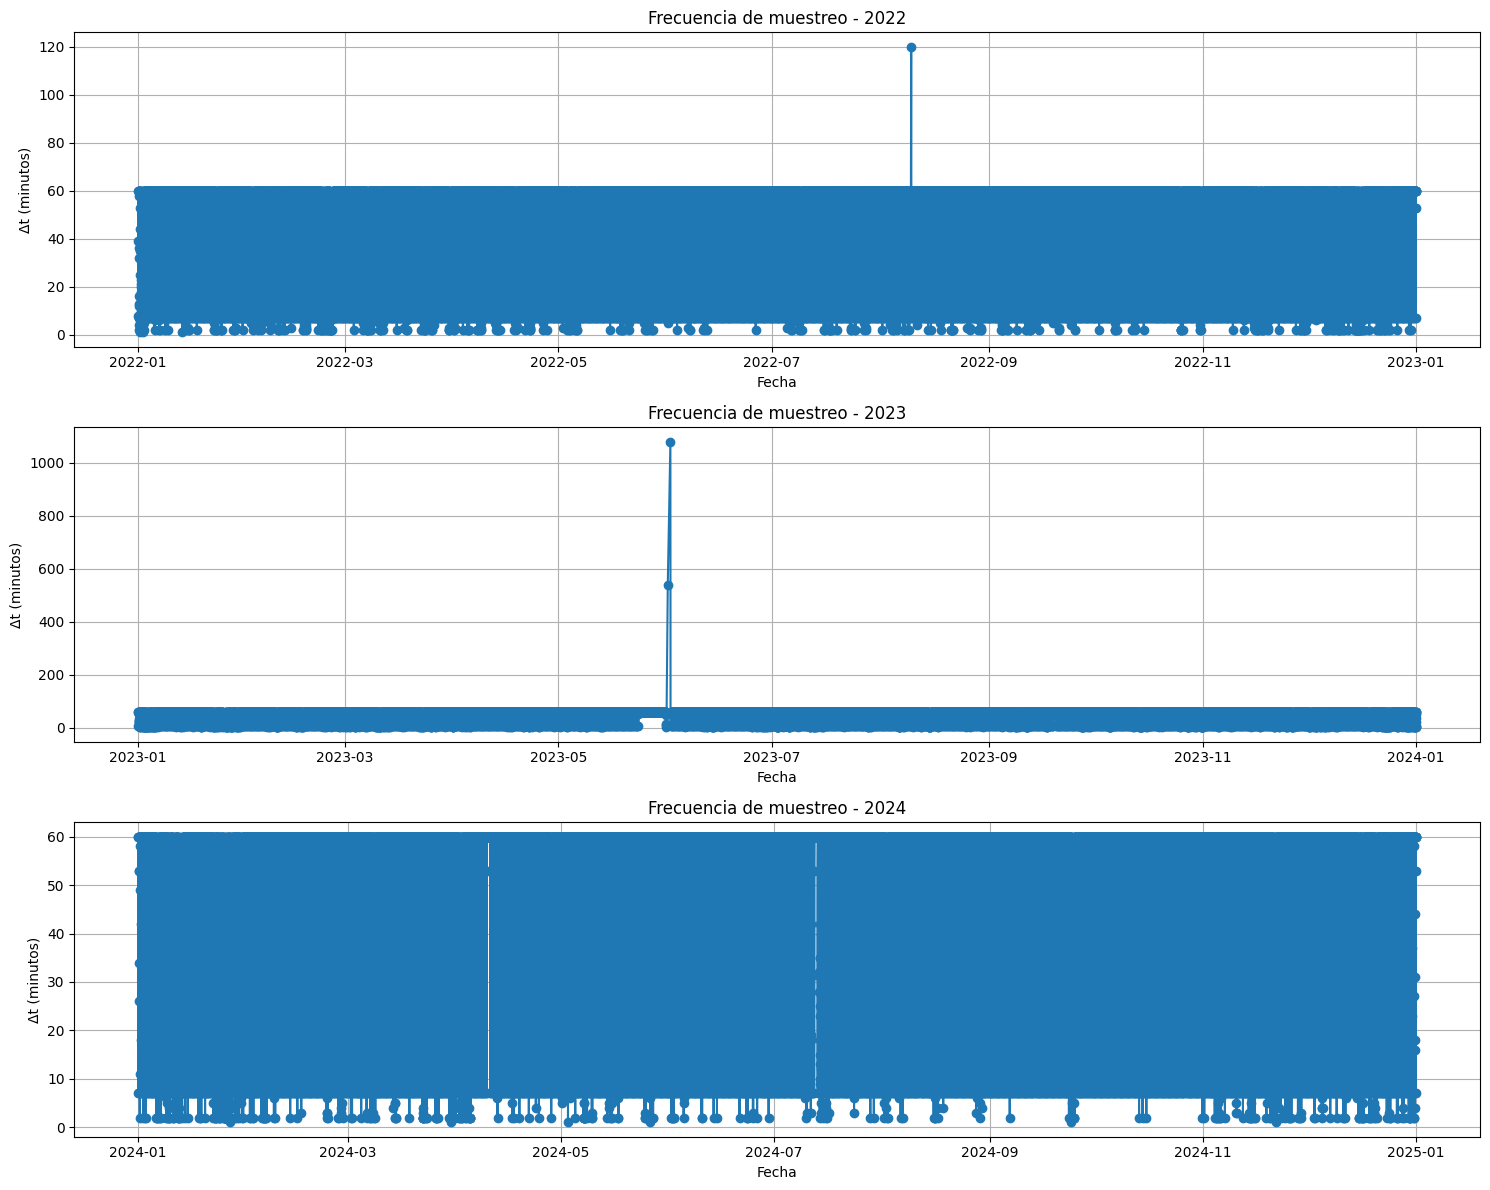

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Tomamos las tres primeras claves
keys = list(df_weather_per_year_filtered.keys())[:3]

fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=False)

for i, key in enumerate(keys):
    df = df_weather_per_year_filtered[key].copy()
    df['DATE'] = pd.to_datetime(df['DATE'])
    df = df.sort_values('DATE')

    # Calcular diferencia de tiempo en minutos
    df['time_diff_min'] = df['DATE'].diff().dt.total_seconds() / 60

    # Graficar en el subplot correspondiente
    axes[i].plot(df['DATE'], df['time_diff_min'], marker='o', linestyle='-')
    axes[i].set_title(f'Frecuencia de muestreo - {key}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Δt (minutos)')
    axes[i].grid(True)

# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show()


In [ ]:
# La variable obtenida es un diccionario de dataframes
with open("../../data/weather/df_weather_raw_per_year.pk1", "wb") as f:
    pickle.dump(df_weather_per_year_filtered, f)